# Diabetes Diagnosis with Support Vector Machines

## Import Libraries



In [1]:
#import libraries and packages
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

## Get Data

In [2]:
#define column names
column_names = ["pregnancies", "glucose", "bpressure", "skinfold", "insulin", "bmi", "pedigree", "age", "class"]
df = pd.read_csv('data.csv', names=column_names)

#check shape
print(df.shape)

#preview
df.head()

(768, 9)


,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Extract Features

In [3]:
#define X, y
X = df.drop(columns=['class'], axis=1)
y = df['class']

In [4]:
#preview
X.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


## Extract Class Labels

In [5]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: class, dtype: int64

## Split Dataset

In [6]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)

#check shape
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [7]:
#see subdataset
X_test.head()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age
601,6,96,0,0,0,23.7,0.190,28
224,1,100,66,15,56,23.6,0.666,26
766,1,126,60,0,0,30.1,0.349,47
17,7,107,74,0,0,29.6,0.254,31
369,1,133,102,28,140,32.8,0.234,45


## Normalize Features

In [8]:
#instantiate
scaler = StandardScaler()

#fit & transform
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [9]:
X_train[:5, :]

array([[-1.15995078, -0.2709359 ,  0.54465661, -0.28872154, -0.68489127,
        -0.11834059,  1.30293365, -1.07765731],
       [-0.27539873, -0.05214689,  0.00487305,  0.58459072,  0.44260201,
         1.39953692, -0.02940135, -0.29357654],
       [-1.15995078,  1.79193195,  1.08444017,  0.39745238, -0.68489127,
         1.5526002 ,  0.70938156, -0.90341714],
       [-0.8651001 , -0.77102508,  0.00487305, -0.35110098, -0.68489127,
        -1.75101556, -0.99234489, -1.07765731],
       [ 0.90400401, -0.23968033, -0.21104038, -1.28679268, -0.68489127,
         0.11125433, -0.64189659,  0.75186449]])

## Training a Support Vector Machine

In [10]:
#instantiate
clf = svm.SVC(kernel='sigmoid')

#fit
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Decision Boundary

In [11]:
#make prediction on train set
y_pred = clf.predict(X_train)
print(y_pred)

[0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 1 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 1 0 0 0 0 0 1 1 1 0 0 1 

In [12]:
#get accuracy score
accuracy_score(y_train, y_pred)

0.6597222222222222

## SVM Kernels

In [13]:
#find the best decision boundary
for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    clf = svm.SVC(kernel=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    print(k)
    print(accuracy_score(y_train, y_pred))

linear
0.7725694444444444
poly
0.7829861111111112
rbf
0.8072916666666666
sigmoid
0.6597222222222222


## Instantiating the Best Model

In [14]:
#create another model with the best kernel 'rbf'
clf = svm.SVC(kernel='rbf')

#fit
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Making a single prediction

In [15]:
#create a patient
patient_1 = np.array([[1., 200., 75., 40., 0.,45., 1.5, 20]])

#normalize these values
patient_1 = scaler.transform(patient_1)

#predict
clf.predict(patient_1)

array([1])

In [16]:
#create a patient
patient_2 = np.array([[1., 50., 75., 40., 0.,45., 1.5, 20]])

#normalize these values
patient_2 = scaler.transform(patient_2)

#predict
clf.predict(patient_2)

array([0])

## Testing Set Prediction

In [17]:
#get patient from test set
patient_test1 = np.array([X_test.iloc[0]])

#normalize
patient_test1 = scaler.transform(patient_test1)

#predict
print(clf.predict(patient_test1))

#compare with true prediction
print(y_test.iloc[0])

[0]
0


In [18]:
#get patient from test set
patient_test2 = np.array([X_test.iloc[8]])

#normalize
patient_test2 = scaler.transform(patient_test2)

#predict
print(clf.predict(patient_test2))

#compare with true prediction
print(y_test.iloc[8])

[0]
1



## Accuracy on Testing Set

In [19]:
#normalize all test set feature
X_test = scaler.transform(X_test)

In [20]:
#generate predictions for the whole set
y_pred = clf.predict(X_test)

In [21]:
#get accuracy score
print(accuracy_score(y_test, y_pred))

0.8020833333333334


## Comparison to All-Zero Prediction

In [22]:
#assume no one has diabetes
y_zero = np.zeros(y_test.shape)

#get accuracy
print(accuracy_score(y_test, y_zero))

0.640625


## Precision and Recall

In [23]:
#get classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       123
           1       0.80      0.59      0.68        69

    accuracy                           0.80       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.80      0.80      0.79       192



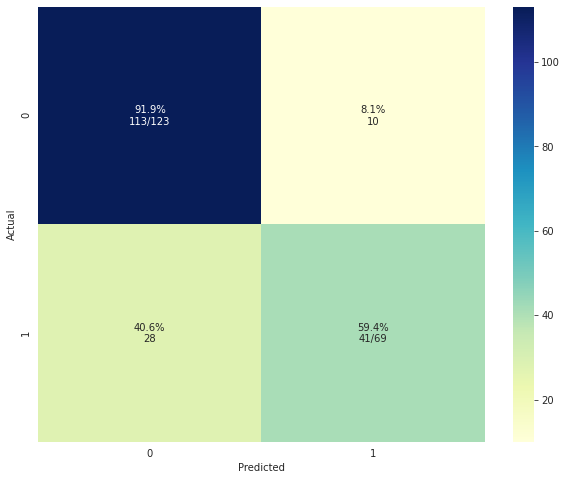

In [24]:
#plot confusion matrix function
def plot_cm(y_true, y_pred, figsize=(10, 8)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

#apply function    
plot_cm(y_test, y_pred)

AUC: 0.7564510427712973


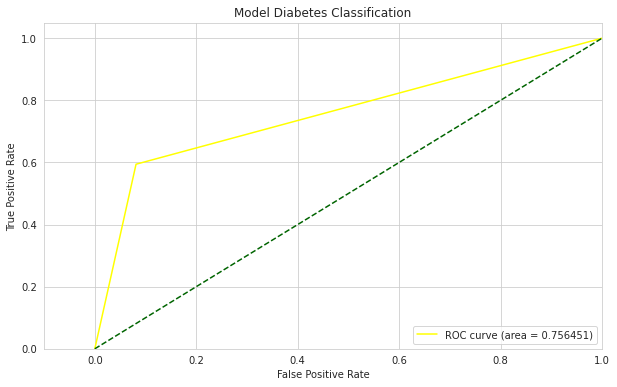

In [25]:
#roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'yellow', label = 'ROC curve (area = %f)' % auc)
plt.plot([0, 1], [0, 1], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Model Diabetes Classification')
plt.legend(loc = "lower right")
plt.show()